# __An Introduction to the Monte Carlo Method__


<br>

DATA 5600: Introduction to Regression and Machine Learning for Analytics <br>
Author: Tyler J. Brough <br>
Last Updated: September 1, 2021 <br>


<br>
<br>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Increase the plot size for figures
plt.rcParams['figure.figsize']=20,20

In [2]:
%matplotlib inline

<br>
<br>

This set of notes introduces some basic concepts regarding statistical limit theory as well as the Monte Carlo method.

## Statistical Limit Theory

### Limiting Distribution

Consider a sequence of random variables $Y_{1}, Y_{2}, \ldots$ with a corresponding sequence of CDFs $G_{1}(y), G_{2}(y), \ldots$ so that for each $n = 1, 2, \ldots$

$$G_{n}(y) = P[Y_{n} \le y]$$

***Definition***

If $Y_{n} \sim G_{n}(y)$ for each $n = 1, 2, \ldots$, and if for some CDF $G(y)$

$$\lim_{n\to\infty} G_{n}(y) = G(y)$$

for all values $y$ at which $G(y)$ is continous, then the sequence $Y_{1}, Y_{2}, \ldots$ is said to **converge in distribution** to $Y \sim G(y)$, denoted by $Y_{n} \xrightarrow{d} Y$. The distribution corresponding to the CDF $G(y)$ is called the **limiting distribution** of $Y_{n}$.

### Basic Convergence Concepts

***Definition***

A sequence of random variables, $Y_{1}, Y_{2}, \ldots$, is said to **converge in probability** to the random variable $Y$ if 

$$\lim_{n\to\infty} P[|Y_{n} - Y| < \varepsilon] = 1$$

for every $\varepsilon > 0$.


***Definition***

The sequence **converges almost surely** to $Y$ if 

$$P[lim_{n\to\infty} |Y_{n} - Y| < \varepsilon] = 1$$

for every $\varepsilon > 0$. 

### The Law of Large Numbers

***Definition***

The law which states that the larger a sample, the nearer its mean is to that of the parent population from which the sample is drawn. More formally: for every $\varepsilon > 0$, the probability

$$\{|\bar{Y} - Y| > \varepsilon \} \rightarrow 0 \quad \mbox{as} \quad n \rightarrow \infty$$

where $n$ is the sample size, $\bar{Y}$ is the sample mean, and $\mu$ is the parent mean.

More rigorous definitions are the following:

For i.i.d sequences of one-dimensional random variables $Y_{1}, Y_{2}, \ldots$, let $\bar{Y}_{n} = \frac{1}{n} \sum\limits_{i=1}^{n} Y_{i}$.

The *weak law of large numbers* states that $\bar{Y}_{n}$ converges in probability to $\mu = E\{Y_{i}\}$ if $E\{|Y_{i}|\} < \infty$.

The *strong law of large numbers* states that $\bar{Y}_{n}$ converges almost surely to $\mu$ if $E\{|Y_{i}|\} < \infty$.

Both results hold under the more stringent but easily checked condition that $var\{Y_{i}\} = \sigma^{2} < \infty$.

### Using Simulation to Check the Law of Large Numbers

We can use simulation to check the Law of Large Numbers. Consider a fair die with six sides and outcomes $Y = \{1, 2, 3, 4, 5, 6\}$, each with $P[Y_{i} = y] = \frac{1}{6}$. The true mean is 

$$ \mu = E\{Y\} = \frac{1}{6}[1 + 2 + 3 + 4 + 5 + 6] = 3.5$$

We can verify this in `Python`:

In [3]:
x = np.arange(1,7)
mu = (1/6) * x.sum()
x

array([1, 2, 3, 4, 5, 6])

In [4]:
mu

3.5

Now let's simulate some rolls of the die and collect some data. We will let our sample size increase and plot the estimated mean.

We can simulate a single roll of the die as follows:


In [5]:
np.random.randint(1,7)

2

We can also simulate many at once as follows:

In [6]:
np.random.randint(1,7, size=100)
    

array([6, 5, 1, 2, 1, 5, 3, 1, 1, 6, 1, 4, 4, 5, 2, 1, 4, 5, 5, 4, 4, 6,
       6, 6, 4, 1, 6, 3, 1, 6, 4, 1, 1, 2, 2, 2, 6, 5, 1, 1, 6, 2, 5, 5,
       1, 2, 5, 2, 6, 6, 3, 6, 4, 3, 1, 6, 5, 2, 1, 4, 5, 4, 1, 3, 1, 3,
       4, 6, 2, 3, 2, 3, 3, 6, 1, 6, 4, 2, 3, 6, 1, 3, 6, 1, 4, 6, 3, 1,
       5, 2, 6, 2, 5, 5, 5, 5, 5, 5, 5, 6])

Text(0, 0.5, 'Estimated Mean')

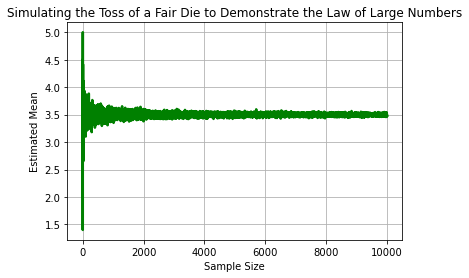

In [7]:
m = 10000
sizes = np.arange(1,m + 1)
means = np.zeros((m,))

for i in range(len(sizes)):
    y = np.random.randint(1,7, size=sizes[i])
    means[i] = y.mean()
    
plt.plot(means, 'g', lw = 2.5)
plt.grid(True)
plt.title("Simulating the Toss of a Fair Die to Demonstrate the Law of Large Numbers")
plt.xlabel("Sample Size")
plt.ylabel("Estimated Mean")

In [8]:
means[:10]

array([3.        , 2.        , 3.66666667, 4.5       , 1.4       ,
       3.83333333, 5.        , 3.25      , 3.88888889, 3.        ])

We can do a similar simulation for the flipping of a fair coin. We can simulate the flip of a coin with the Binomial distribution as follows:

In [9]:
np.random.binomial(1, 0.5, 100)

array([0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])

Text(0, 0.5, 'Estimated Mean')

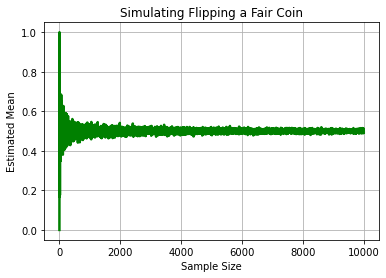

In [10]:
m = 10000
sizes = np.arange(1,m + 1)
means = np.zeros((m,))

for i in range(len(sizes)):
    y = np.random.binomial(1, 0.5, sizes[i])
    means[i] = y.mean()
    
plt.plot(means, 'g', lw = 2.5)
plt.grid(True)
plt.title("Simulating Flipping a Fair Coin")
plt.xlabel("Sample Size")
plt.ylabel("Estimated Mean")

## The Central Limit Theorem


The theorem that states that, if samples of size $n$ are taken from a parent population with mean $\mu$ and standard deviation $\sigma$, then the distribution of their means will be approximately normal with:

$$\mbox{Mean} = \mu$$

and

$$\mbox{Standard deviation} = \frac{\sigma}{\sqrt{n}}$$

As the sample size $n$ increases, this distribution approaches the normal distribution with increasing accuracy. Thus in the limit, as $n \rightarrow \infty$, the distribution of the sample means $\rightarrow$ Normal, mean $\mu$, standard deviation $\sigma / \sqrt{n}$.

If the parent population is itself normal, the distribution of the sample means will be normal, whatever the sample size. If the parent population is of finite size $N$, two possibilties arise:

1. If the sampling is carried out with replacement, the theorem stands as stated;
2. If there is no replacement, the standard deviation of the sample mean is:

$$\frac{\sigma}{\sqrt{n}} \sqrt{\frac{N - n}{N - 1}}$$

The factor $\sqrt{\frac{N - n}{N - 1}}$ is called the **finite population correction.**

The central limite theorem provides the basis for much of sampling theory; it can be summed up, as follows. If $n$ is not small, the sampling distribution of the means is approximately normal, has $\mbox{mean} = \mu$ (the parent mean), and has standard deviation $\sigma / \sqrt{n}$ (where $\sigma$ is the parent standard deviation).

We can use simulation to build intuition for the central limit theorem as well. Consider the mean of a sample from an exponential distribution. Recall that the density of the exponential distribution is the following:

$$f(x) = \frac{1}{\theta}e^{-x/\theta}$$

for $\theta > 0$ and $x > 0$.

In `Python` we can simulate from the exponential distribution as follows:

In [11]:
np.random.exponential(size=10)

array([2.78311719, 0.24039029, 0.82412276, 1.95148689, 0.67044482,
       1.18681714, 0.68565633, 1.91069674, 0.50083041, 0.46834519])

In [12]:
%matplotlib inline

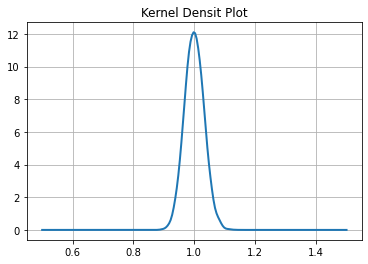

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

m = 10000
n = 1000 # start at 10 and move up to 10000

means = np.zeros((m,))

for i in range(m):
    x = np.random.exponential(size=n)
    means[i] = x.mean()
    
density = gaussian_kde(means)
xs = np.linspace(0.5,1.5,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs), lw = 2)
plt.title("Kernel Densit Plot")
plt.grid(True)
plt.show()